In [40]:
#Code utilities
import logging
import os 
import random
from functools import partial

#Core libraries
import torch
import torchvision.transforms as transforms
from PIL import ImageFilter
from PIL import Image
from torchvision import datasets, transforms
from torchvision.models import resnet 
from tqdm import tqdm 
import numpy as np

#Metric learning utilities
from pytorch_metric_learning import losses
from pytorch_metric_learning.utils import logging_presets

#Configurations
logging.getLogger().setLevel(logging.INFO)
device = torch.device("cuda")

In [41]:
MEAN = [0.5435, 0.5091, 0.4462]
STD = [0.2979, 0.2869, 0.2920]

normalize = transforms.Normalize(MEAN, STD)

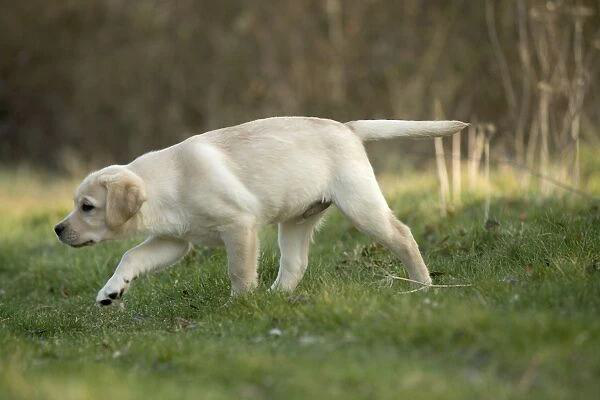

In [42]:
image_path = 'data/train/Exploring/Labrador_Retriever25.jpeg'
image = Image.open(image_path)
image

In [74]:
class TwoCropsTransform:
    """Take two random crops of one image as the query and key.
       Expects a torch tensor as an arguement in __call__(x) function and returns a list of 2 torch tensors."""

    def __init__(self, base_transform):
        self.base_transform = base_transform

    def __call__(self, x):
        q = self.base_transform(x)
        k = self.base_transform(x)
        return [q, k]
    
train_transform = transforms.Compose(
        [
            transforms.RandomResizedCrop(96),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomApply([transforms.ColorJitter(0.4, 0.4, 0.4, 0.1)], p=0.8),
            transforms.RandomGrayscale(p=0.2),
            transforms.ToTensor(),
            normalize,
        ]
    )
train_transform = TwoCropsTransform(train_transform)

In [75]:
crops = train_transform(image)
untensorize = transforms.ToPILImage()
tensorize = transforms.Compose([transforms.ToTensor()])

In [76]:
print(crops[0].shape)
print(crops[1].shape)

torch.Size([3, 96, 96])
torch.Size([3, 96, 96])


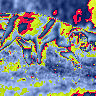

In [77]:
untensorize(crops[0])

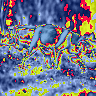

In [73]:
untensorize(crops[1])